# Bayesian performance analysis example in pyfolio

There are also a few more advanced (and still experimental) analysis methods in pyfolio based on Bayesian statistics. 

The main benefit of these methods is **uncertainty quantification**. All the values you saw above, like the Sharpe ratio, are just single numbers. These estimates are noisy because they have been computed over a limited number of data points. So how much can you trust these numbers? You don't know because there is no sense of uncertainty. That is where Bayesian statistics helps as instead of single values, we are dealing with probability distributions that assign degrees of belief to all possible parameter values.

Lets create the Bayesian tear sheet. Under the hood this is running MCMC sampling in [`PyMC3`](http://pymc-devs.github.io/pymc3/) to estimate the posteriors which can take quite a while (that's the reason why we don't generate this by default in `create_full_tear_sheet()`).

## Import pyfolio

In [1]:
%matplotlib inline
import pyfolio as pf

## Fetch the daily returns for a stock

In [3]:
stock_rets = pf.utils.get_symbol_rets('FB')

## Create Bayesian tear sheet



In [5]:
out_of_sample = stock_rets.index[-40]

 [-----------------100%-----------------] 2000 of 2000 complete in 5.9 sec

/home/wiecki/miniconda3/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  return f(*args, **kwds)
/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


 [-----------------100%-----------------] 2000 of 2000 complete in 3.9 sec

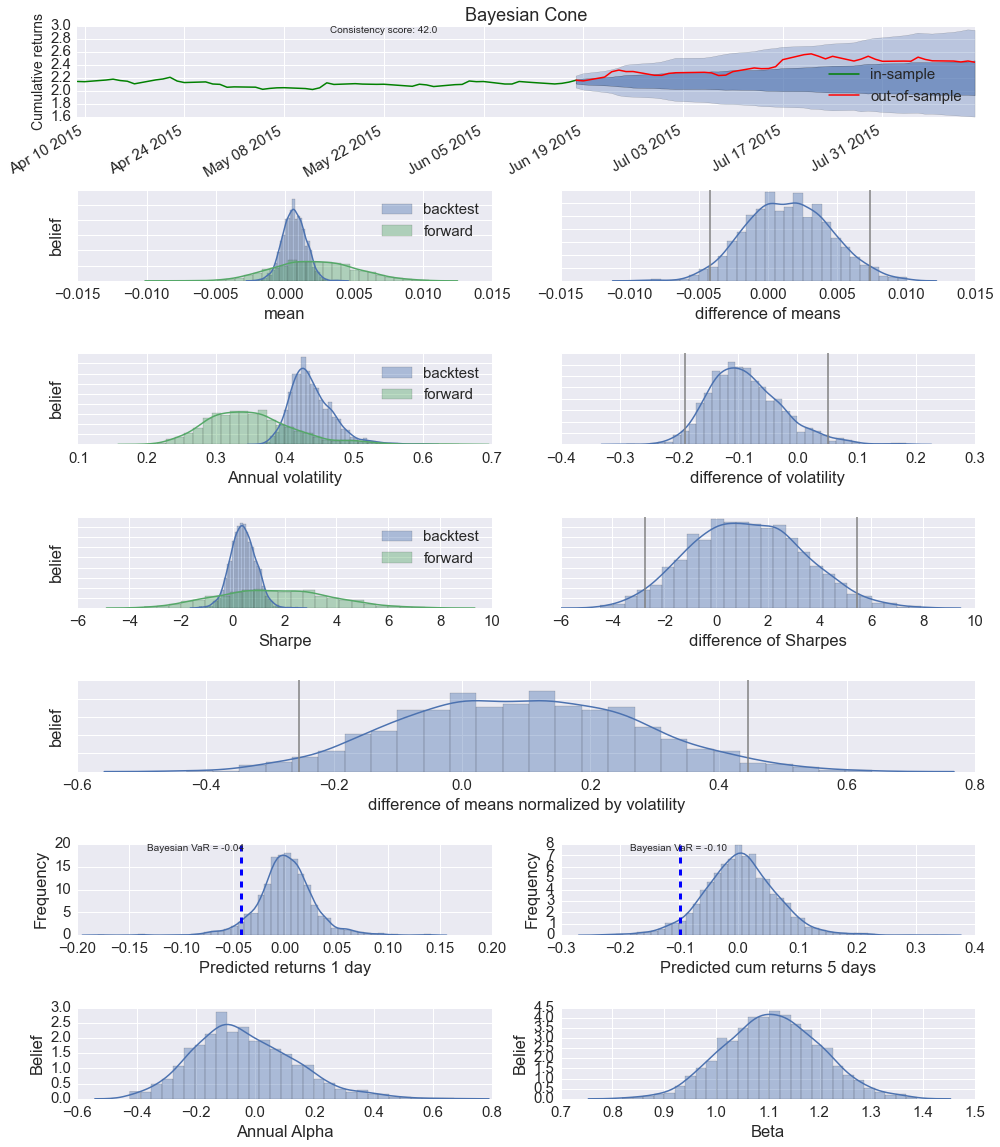

In [7]:
pf.create_bayesian_tear_sheet(stock_rets, live_start_date=out_of_sample)

Lets go through these row by row:

* The first one is the Bayesian cone plot that is the result of a summer internship project of Sepideh Sadeghi here at Quantopian. It's similar to the cone plot you already saw at in the tear sheet above but has two critical additions: (i) it takes uncertainty into account (i.e. a short backtest length will result in a wider cone), and (ii) it does not assume normality of returns but instead uses a [Student-T distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) with heavier tails.
* The next row is comparing mean returns of the in-sample (backest) and OOS (forward) period. As you can see, mean returns are not a single number but a (posterior) distribution that gives us an indication of how certain we can be in our estimates. As you can see, the green distribution on the left side is much wider representing our increased uncertainty due to having less OOS data. We can then calculate the difference between these two distributions as shown on the right side. The grey lines denote the 2.5% and 97.5% percentiles. Intuitively, if the right grey line is lower than 0 you can say that with probability > 97.5% the OOS mean returns are below what is suggested by the backtest. The model used here is called [BEST](http://www.indiana.edu/~kruschke/BEST/BEST.pdf) and was developed by John Kruschke.
* The next couple of rows follow the same pattern but are an estimate of annual volatility, Sharpe ratio and their respective differences.
* The 5th row shows the effect size or the difference of means normalized by the standard deviation and gives you a general sense how far apart the two distributions are. Intuitively, even if the means are significantly different, it may not be very meaningful if the standard deviation is huge amounting to a tiny difference of the two returns distributions.
* The 6th row shows predicted returns (based on the backtest) for tomorrow, and 5 days from now. The blue line indicates the probability of losing more than 5% of your portfolio value and can be interpeted as a Bayesian VaR estimate.
* Lastly, a Bayesian estimate of annual alpha and beta. In addition to uncertainty estimates, this model, like all above ones, assumes returns to be T-distributed which leads to more robust estimates than a standard linear regression would.

For more information on Bayesian statistics, check out these resources:
* My personal blog: http://twiecki.github.io/
* A talk I gave in Singapore on Probabilistic Programming in Quantitative Finance: http://blog.quantopian.com/probabilistic-programming-for-non-statisticians/
* The IPython NB book [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers).